In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

In [21]:
datafile = 'data/ex1data1.txt'
data = np.loadtxt(datafile, delimiter = ',', unpack=True)
X = np.transpose(data[:-1])
Y = np.transpose(data[-1:])
m = Y.size
#Insert constant column 1
X = np.insert(X, 0, values= 1, axis= 1)
print(m)

97


1. Plotting the data

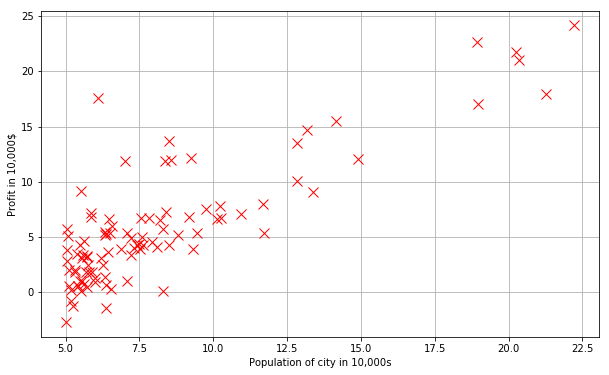

In [17]:
plt.figure(figsize=(10,6))
#Plot X and Y
plt.plot(X[:,1], Y[:,0], 'rx', markersize = 10)
plt.grid(True)
plt.ylabel('Profit in 10,000$')
plt.xlabel('Population of city in 10,000s')

2. compute Cost function

In [55]:
#h(theta)
def h(theta, X):
    return np.dot(X, theta)

#Cost function
def computeCost(theta, X, Y):
    """
    theta is a n-dimentional vector
    X is m*n matrix
    Y is m*1 matrix
    """
    J = float(1./2./m * np.dot((h(theta,X) - Y).T, (h(theta,X) - Y)))
    return J

theta = np.zeros((X.shape[1],1))

#cost should be 32.07
computeCost(theta,X,Y)

32.07273387745567

3. Gradient descent 

In [63]:
def gradientDescent(theta, X, Y, alpha, iteration):
    new_theta = theta
    Jvec = []
    theta_vec = []
    for i in range(iteration):
        theta_vec.append(list(new_theta[:,0]))
        J = computeCost(theta, X, Y)
        Jvec.append(J)
        for j in range(len(theta)):
            new_theta[j] = theta[j] - float(alpha/m*np.sum((h(theta, X) - Y)*X[:,j].reshape(X.shape[0],1)))
        theta = new_theta
    return theta, Jvec, theta_vec

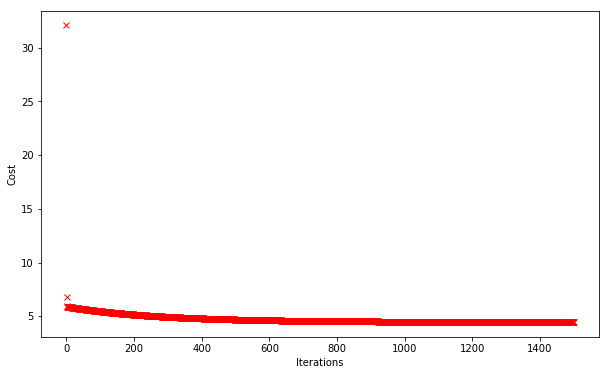

In [68]:
#running gradient descent and visualizing J
theta = np.zeros((X.shape[1],1))
theta, Jvec, theta_vec = gradientDescent(theta, X, Y, alpha = 0.01, iteration = 1500)
plt.figure(figsize = (10,6))
plt.plot(range(1500),Jvec, 'rx')
plt.xlabel('Iterations')
plt.ylabel('Cost')

[-0.058391350515463923, 0.0]